# Ridge Regression

Ridge regression simply works by adding a penalty term along with a variable which determinses how severe the penalty is. This is added to the cost function in order the shift the regression line a little bit to prevent overfitting or variance. 

* If the value of lambda is 0 Ridge Regression is just Linear Regression

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = np.array([[1],[2],[3],[4],[5]])
X_test = np.array([[6],[7],[8],[9],[10]])

y_train = np.array([[2],[4],[6],[8],[10]])
y_test = np.array([[13],[15],[18],[23],[28]])

lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

TRAINING...


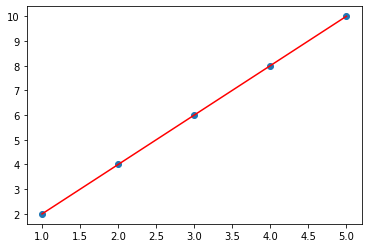

In [3]:
import matplotlib.pyplot as plt

m = lin.coef_
b = lin.intercept_
train_pred = lin.predict(X_train)

print("TRAINING...")
plt.scatter(X_train,y_train)
plt.plot(X_train, m*X_train+b,'-r')

TESTING...


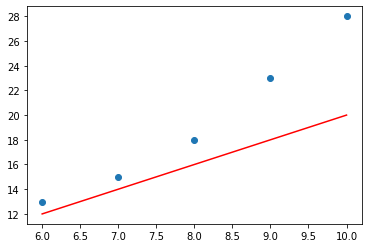

In [4]:
print("TESTING...")
test_pred = lin.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test, m*X_test+b,'-r')

In [5]:
lin.coef_, lin.intercept_

(array([[2.]]), array([0.]))

In [6]:
print("Linear regression prediction in training:",train_pred)
print("Linear regression prediction in testing:",test_pred) # Bad predictions due to overfitting

Linear regression prediction in training: [[ 2.]
 [ 4.]
 [ 6.]
 [ 8.]
 [10.]]
Linear regression prediction in testing: [[12.]
 [14.]
 [16.]
 [18.]
 [20.]]


In [39]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=-2, solver="cholesky")
ridge.fit(X_train, y_train)

Ridge(alpha=-2, solver='cholesky')

In [40]:
ridge.coef_, ridge.intercept_

(array([[2.5]]), array([-1.5]))

Ridge training..


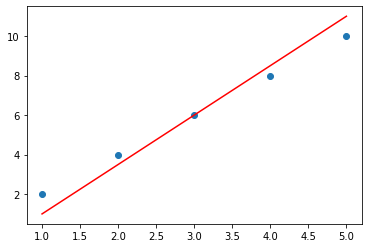

In [41]:
import matplotlib.pyplot as plt
ridge_m = ridge.coef_
ridge_b = ridge.intercept_
ridge_train_pred = ridge.predict(X_train)

print("Ridge training..")
plt.scatter(X_train, y_train)
plt.plot(X_train, ridge_m*X_train+ridge_b,'-r')

Ridge testing..


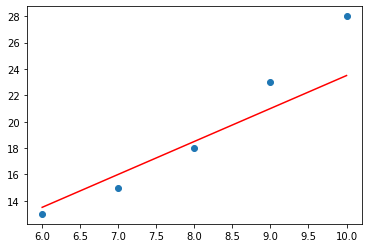

In [42]:
print("Ridge testing..")

ridge_test_pred = ridge.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, ridge_m*X_test+ridge_b,'-r')

In [44]:

print("Linear regression prediction in training:{}, Original values:{}".format(train_pred.reshape(1,-1), 
                                                                              y_train.reshape(1,-1)))
print("Linear regression prediction in testing:{}, Original values:{}".format(test_pred.reshape(1,-1),
                                                                              y_test.reshape(1,-1))) 

print("Ridge prediction in training:{}, Original values:{}".format(ridge_train_pred.reshape(1,-1),y_train.reshape(1,-1)))
print("Ridge test prediction:{}, Original values:{}".format(ridge_test_pred.reshape(1,-1), y_test.reshape(1,-1)))

Linear regression prediction in training:[[ 2.  4.  6.  8. 10.]], Original values:[[ 2  4  6  8 10]]
Linear regression prediction in testing:[[12. 14. 16. 18. 20.]], Original values:[[13 15 18 23 28]]
Ridge prediction in training:[[ 1.   3.5  6.   8.5 11. ]], Original values:[[ 2  4  6  8 10]]
Ridge test prediction:[[13.5 16.  18.5 21.  23.5]], Original values:[[13 15 18 23 28]]


# Error calculation

In [20]:
from sklearn.metrics import mean_squared_error

# Linear Regression
lin_train_mse = mean_squared_error(train_pred, y_train)
lin_test_mse = mean_squared_error(test_pred, y_test)

# Ridge Regression
ridge_train_mse = mean_squared_error(ridge_train_pred, y_train)
ridge_test_mse = mean_squared_error(ridge_test_pred, y_test)

In [21]:
print("Linear regression MSE in training:", lin_train_mse)
print("Linear regression MSE in testing:", lin_test_mse)

print("\nRidge regression MSE in training:", ridge_train_mse)
print("Ridge regression MSE in testing:", ridge_test_mse)

Linear regression MSE in training: 0.0
Linear regression MSE in testing: 19.0

Ridge regression MSE in training: 0.4999999999999993
Ridge regression MSE in testing: 5.149999999999999
